# WHO Dataset
- $\href{https://covid19.who.int/data}{\text{WHO World Covid Data}}$
- $\text{2020-02-01 to 2022-09-05}$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("WHO-COVID-19-global-data.csv")

In [3]:
df = df[["Date_reported", "Country", "New_cases"]]
df["Date_reported"] = pd.to_datetime(df["Date_reported"])
# identify countries we have:
countries = df["Country"].unique()
# print(countries)
df = df[(df["Date_reported"]>="2020-02-01") & (df["Date_reported"]<"2022-09-06")] # between 2020-02-01 to 2022-09-05
df = df.rename(columns={"Date_reported":"date","Country":"country","New_cases":"cases"})
df

,date,country,cases
29,2020-02-01,Afghanistan,0
30,2020-02-02,Afghanistan,0
31,2020-02-03,Afghanistan,0
32,2020-02-04,Afghanistan,0
33,2020-02-05,Afghanistan,0
...,...,...,...
276856,2022-09-01,Zimbabwe,12
276857,2022-09-02,Zimbabwe,6
276858,2022-09-03,Zimbabwe,11
276859,2022-09-04,Zimbabwe,0


In [4]:
# create a df1 of only selected counties, joint by time
df1 = df[df["country"] == countries[0]]
df1 = df1[["date","cases"]]
df1 = df1.rename(columns={"cases" : countries[0]})
for country in countries[1:]:
    # df of only selected counties
    temp = df[df["country"] == country]
    # drop "area", rename "cases" with county name
    temp = temp[["date","cases"]]
    temp = temp.rename(columns={"cases" : country})
    df1 = df1.merge(temp, on = "date")
df1

,date,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
0,2020-02-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
1,2020-02-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2020-02-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2020-02-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,2022-09-01,270,446,32,0,0,0,0,25,0,...,47,0,14,15,116,2727,0,0,0,12
944,2022-09-02,95,335,55,0,0,0,0,0,0,...,42,0,15,7,111,2680,0,0,0,6
945,2022-09-03,173,263,46,0,0,0,0,0,0,...,34,0,10,0,99,0,0,0,0,11
946,2022-09-04,99,247,21,0,0,37,0,0,11636,...,26,2026,15,31,97,3144,0,0,0,0


In [5]:
df1.to_csv("WorldCases.csv", index = False)

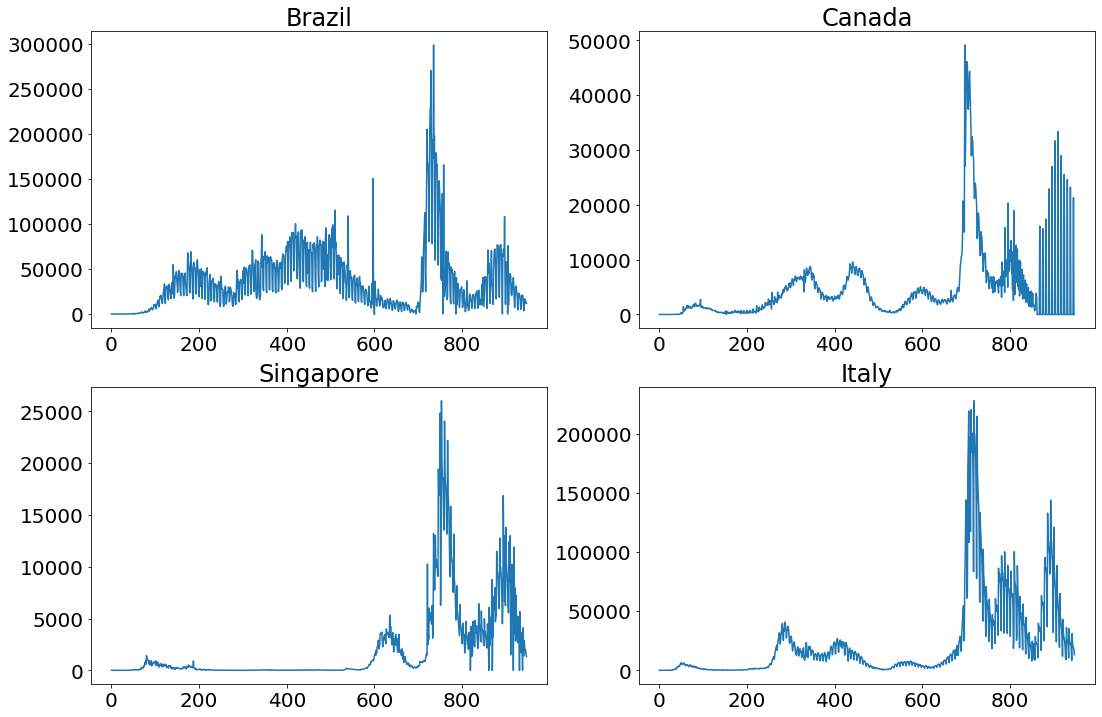

In [6]:
fig = plt.figure(figsize=(18, 12))
plt.rcParams.update({'font.size': 20})
rows, columns = 2, 2
fig.add_subplot(rows, columns, 1)
plt.plot(df1["Brazil"])
plt.title("Brazil")
fig.add_subplot(rows, columns, 2)
plt.plot(df1["Canada"])
plt.title("Canada")
fig.add_subplot(rows, columns, 3)
plt.plot(df1["Singapore"])
plt.title("Singapore")
fig.add_subplot(rows, columns, 4)
plt.plot(df1["Italy"])
plt.title("Italy")

plt.savefig("country_covid.png", dpi=600)
plt.show()

In [9]:
countries

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bonaire',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvado